In [39]:
from fastapi import FastAPI
from pydantic import BaseModel
import pickle
import json
import uvicorn
from pyngrok import ngrok
from fastapi.middleware.cors import CORSMiddleware
import nest_asyncio

In [40]:
!pip install fastapi
!pip install uvicorn
!pip install pickle5
!pip install pydantic
!pip install scikit-learn
!pip install requests
!pip install pypi-json
!pip install pyngrok
!pip install nest-asyncio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
!pip install fastapi 
!pip install uvicorn 
!pip install pydantic 
!pip install pickle5
!pip install scikit-learn
!pip install requests 
!pip install pypi-json 
!pip install pyngrok 
!pip install nest-asyncio 
!pip install pandas-profiling 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.1/132.1 KB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pickle5: filename=pickle5-0.0.11-cp39-cp39-linux_x86_64.whl size=255907 sha256=e3ca88be97b396d9f6f3beaf663ed052d698e511fe3c7123e123a803a1750a7d
  Stored in directory: /root/.cache/pip/wheels/f2/7a/49/9bef8878949914ecb90c08fc5bf30a05e17f475fe7e08b63a8
Successfully built pickle5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/p

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/Utrecht house ml deployment

/content/drive/MyDrive/Utrecht house ml deployment


In [41]:
import numpy as np
import pandas as pd 
import pandas_profiling as pp
import seaborn as sns 
import matplotlib.pyplot as plt
import pickle
import sklearn
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# For deployment
from fastapi import FastAPI
from pydantic import BaseModel
import json
import uvicorn
from pyngrok import ngrok
from fastapi.middleware.cors import CORSMiddleware
import nest_asyncio

In [42]:
# Load data
df = pd.read_csv('./utrechthousinglarge.csv')

id:   Unique identifier for each house

zipcode:   Zip codes 3520 tp 3800.

lot-len:   Length in meters of the plot of land the house is built on.

lot-width:   The width in meters of the plot of land the house is built on. 

lot-area:   The total area of the plot of land the house is built on. 30.0 square meters is a tiny house, 200.0 square meters would be a mansion.

garden-size:   The size of the garden in square meters. 

balcony:   The number of balconies the house has. 

x-coor:   The x-coordinate describing the location of the house.

y-coor:   The y-coordinate describing the location of the house.

buildyear:   The year that the house was built. 

bathrooms:   The number of bathrooms in the house.

## Exploratory Data Analysis



The profile report is interactive and can be toggled

In [ ]:
# For EDA profiling
profile= pp.ProfileReport(df, title = 'Utrecht houses profile report', explorative= True)
profile.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

There are outliers in zipcode, house area and monument variables. The zip code is not very strange considering they are combinations of four separate numbers, and the numerical difference between these numbers could be large. The monument variable entails two classes; 0 and 1.

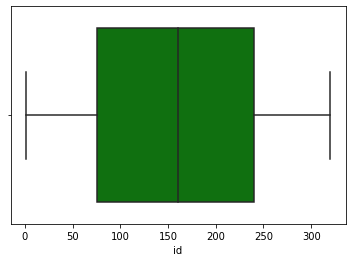

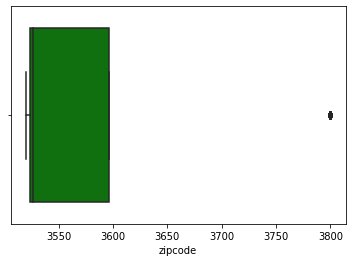

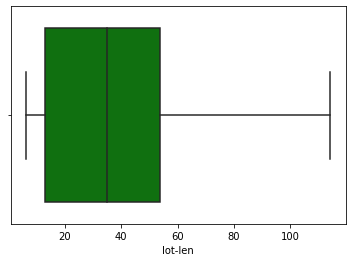

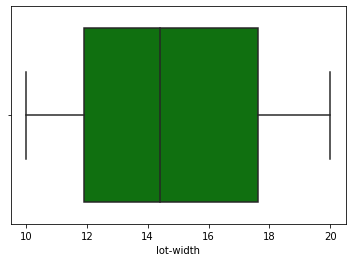

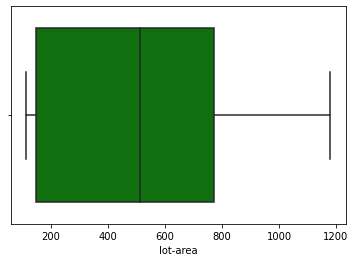

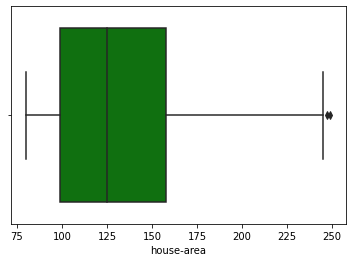

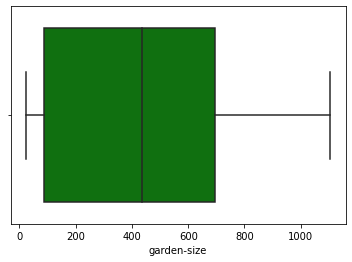

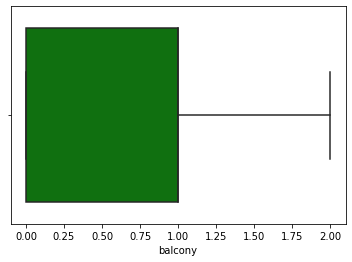

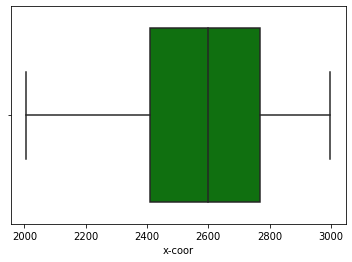

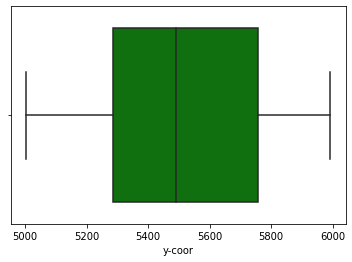

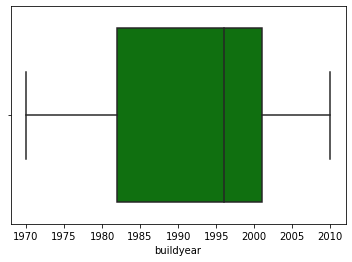

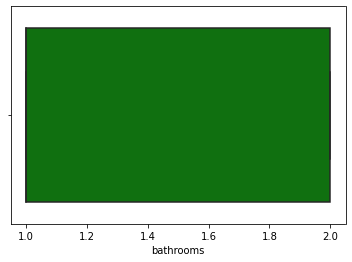

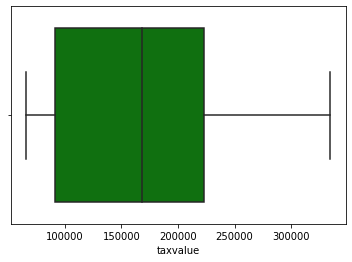

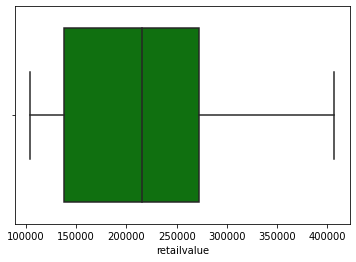

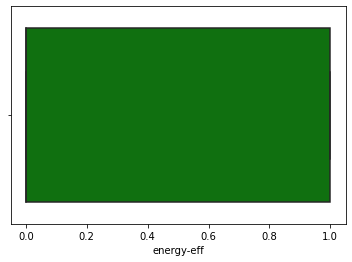

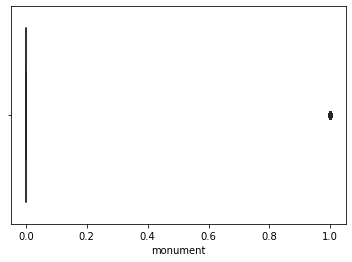

In [ ]:
# Plot to detect outliers
for i in df.columns:color= ('green')
    sns.boxplot(x = df[i], color = 'blue' )
    plt.show()

Lets take a deeper look into house area

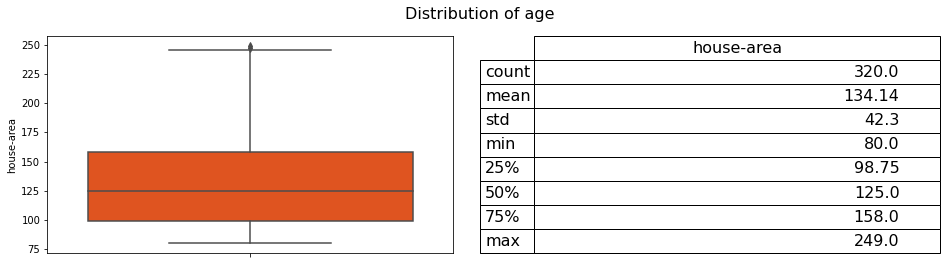

In [ ]:
fig = plt.figure(figsize=(16,4))

ax1 = fig.add_subplot(121)
sns.boxplot(y = df['house-area'], ax=ax1, color='orangered')
describe = df['house-area'].describe().to_frame().round(2)

ax2 = fig.add_subplot(122)
ax2.axis('off')
font_size = 16
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of age', fontsize=16)
plt.show()

We can gain more insight by looking into the distribution of outlying variables

In [7]:
def hist_plot(data, column):
  '''A function to plot histogram
  It takes two arguements; the dataframe, and a column '''
  
  plt.figure(figsize=(5, 2.5))
  sns.histplot(x=column, data=data, multiple='stack')
  plt.show()

The distribution of the house area variable is positively skewed. The majority of the houses have living areas between 80 ton 150 square meters, with an overall mean of 134.14 square meters. This is considerably different from the mansion houses of 200 square meters and above.

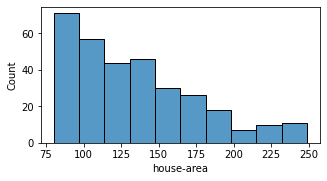

The average living area of houses in Utrecht is 134.14 square meters.


In [17]:
hist_plot(df,'house-area')
print (f'The average living area of houses in Utrecht is {round(df["house-area"].mean(),2)} square meters.')

The Monument variable is distributed into two bins of class 0 and 1. The majority are in class 0 (no monument class), the fewer instances in class 1 (houses with monuments) were considered outliers in the boxplot.

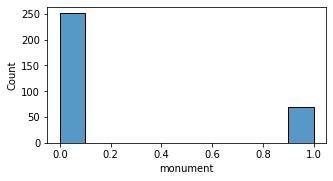

In [ ]:
hist_plot(df,'monument') 

Some of the zip codes recorded in the dataset are numbers before 3550, while those above 3750 weree considered  outliers

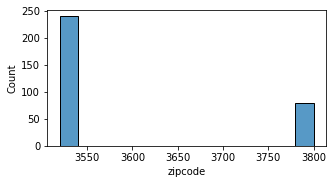

In [8]:
hist_plot(df,'zipcode')

In [24]:
# Plots a scatter plot
def scatter_plot(data, x, y):
  sns.scatterplot(x=data[x], y=data[y])
  plt.show()

The houses with zip codes close to 3800 have higher retail values

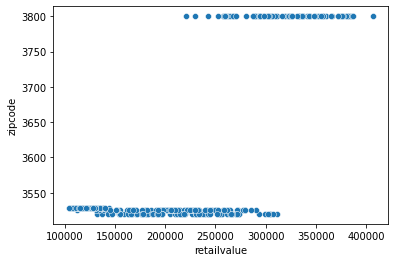

In [39]:
scatter_plot(df, 'retailvalue', 'zipcode')

There is a positive relationship between the length of a plot of land (lot length) and the retail value of the house built on it.




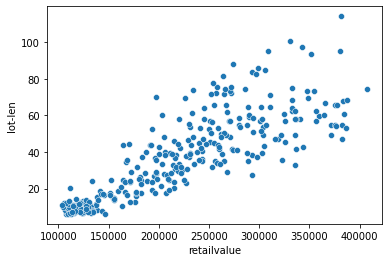

In [40]:
scatter_plot(df, 'retailvalue', 'lot-len')

The visual does not show any relationship between the width of the plot of land and the retail value of the house built on it

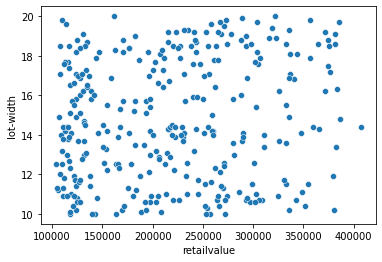

In [42]:
scatter_plot(df, 'retailvalue', 'lot-width')

The retail value increases as the total area of the plot of land increases

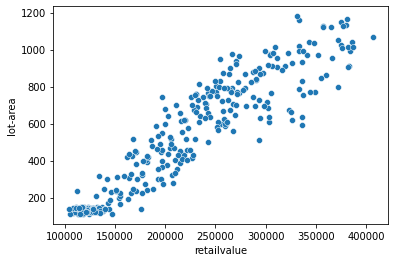

In [41]:
scatter_plot(df, 'retailvalue', 'lot-area',)


The retail value increases as the living area increase.

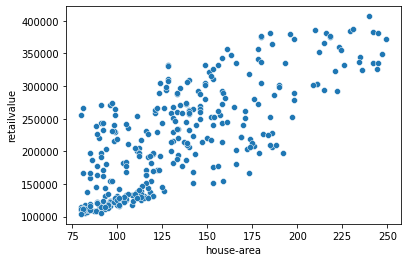

<function matplotlib.pyplot.show(close=None, block=None)>

In [ ]:
scatter_plot(df, x='house-area', y ='retailvalue')

The garden size positively correlates with the retail values

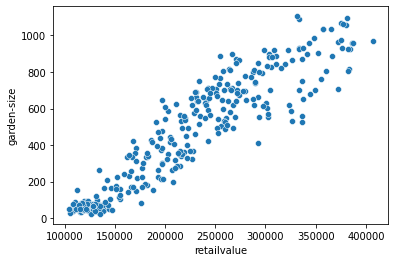

In [30]:
scatter_plot(df, 'retailvalue', 'garden-size')

The visual depicts not much difference between the retail value of houses with 1 balcony and 2. Houses with 3 balconies have higher retail values

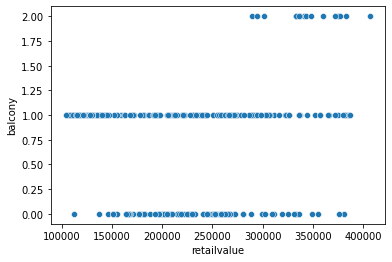

In [31]:
scatter_plot(df, 'retailvalue', 'balcony')

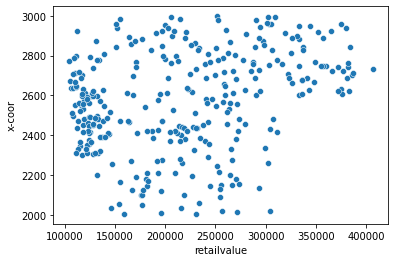

In [32]:
scatter_plot(df, 'retailvalue', 'x-coor')

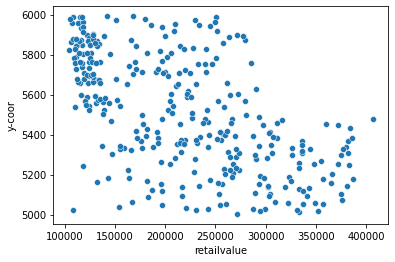

In [33]:
scatter_plot(df, 'retailvalue', 'y-coor')

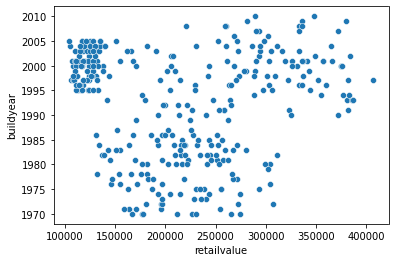

In [34]:
scatter_plot(df, 'retailvalue', 'buildyear')

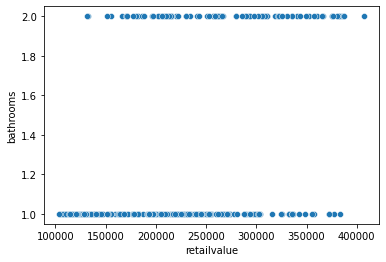

In [35]:
scatter_plot(df, 'retailvalue', 'bathrooms')

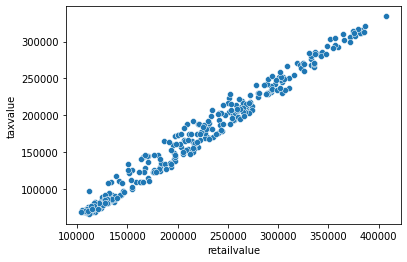

In [36]:
scatter_plot(df, 'retailvalue', 'taxvalue')

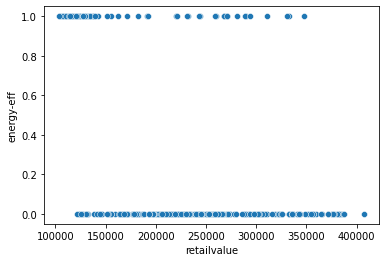

In [37]:
scatter_plot(df, 'retailvalue', 'energy-eff')

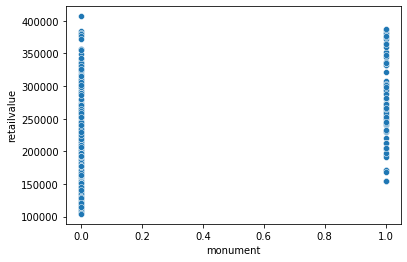

In [38]:
scatter_plot(df,'monument', y= 'retailvalue')

<AxesSubplot:ylabel='Frequency'>

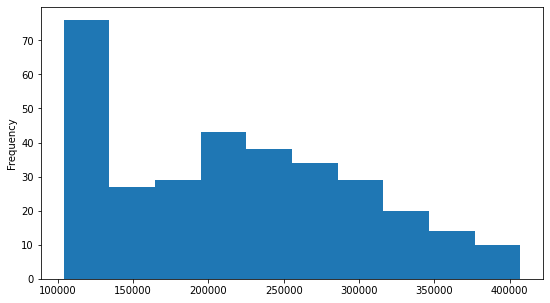

In [ ]:
plt.figure(figsize = (9,5))
df['retailvalue'].plot(kind= 'hist')

We can confirm the strength of the relationships between the variables through statistical tests

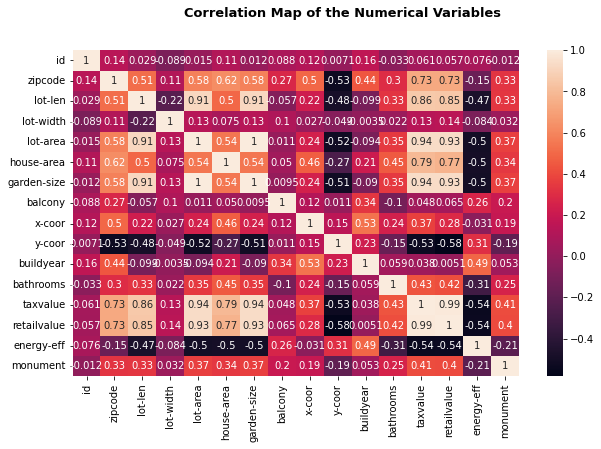

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot = True)
plt.suptitle('Correlation Map of the Numerical Variables', fontweight='heavy', 
             fontsize='13', fontfamily='sans-serif', color = 'black')
plt.show()

In [ ]:
a = df[df.columns[1:]].corr()['retailvalue']
a.sort_values()

y-coor        -0.584044
energy-eff    -0.536191
buildyear      0.005119
balcony        0.065235
lot-width      0.142121
x-coor         0.282685
monument       0.402393
bathrooms      0.417627
zipcode        0.732040
house-area     0.765022
lot-len        0.845651
garden-size    0.933095
lot-area       0.934514
taxvalue       0.991110
retailvalue    1.000000
Name: retailvalue, dtype: float64

The variables with more than 0.5 positive and negatively strong relationship with the target variables were used. The taxvalue column was excluded because it poses a threat of data leakage

In [59]:
df.columns = ['id', 'zipcode', 'lot_len', 'lot_width', 'lot_area', 'house_area',
       'garden_size', 'balcony', 'x_coor', 'y_coor', 'buildyear', 'bathrooms',
       'taxvalue', 'retailvalue', 'energy_eff', 'monument']

In [62]:
# Independent variables
features = ['zipcode',	'lot_len',	'lot_area', 'house_area',	'garden_size',	'y_coor', 'energy_eff']
# Separate predictors from target 
x = df[features]
y = df['retailvalue']

# Data partitioning
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 52, test_size = 20)

# Standardize the data
# sc = StandardScaler()
# x_train = sc.fit_transform(x_train)
# x_test = sc.fit_transform(x_test)

In [6]:
# Hyperparameters to be tuned 
params =  {"learning_rate": [0.01, 0.1, 0.05, 1], "n_estimators": [50, 100, 150, 200], "max_depth" : [3, 5,10,15], "min_samples_split": [2,3,5]}

In [ ]:
# Hyperparameter tunning
grid = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=params, scoring= 'neg_root_mean_squared_error', n_jobs=4, cv= 10, verbose=True)
grid.fit(x_train, y_train)

print("Best hyperparameters :", grid.best_params_)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits
Best hyperparameters : {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 200}


In [73]:
# Create Gradient Boosting Regression model with the best hyperparameters
model = GradientBoostingRegressor(learning_rate= 0.1, n_estimators= 200, max_depth= 3, min_samples_split= 2, random_state=42)

# model fitting
model.fit(x_train, y_train)

r2= model.score(x_train, y_train)
print(f'The model was able to explain the variance of {r2}')

# Predict on test set
pred= model.predict(x_test)

# Get evaluation metrics
mse = mean_squared_error(y_test, pred) 
rmse = mean_squared_error(y_test, pred, squared= False) 

print(f'Mean square error between actual and predicted: {mse}')
print(f'Root Mean square error between actual and predicted : {rmse}')

The model was able to explain the variance of 0.9993405656303914
Mean square error between actual and predicted: 77300666.64021538
Root Mean square error between actual and predicted : 8792.079767621275


The area of the plot of land appeared to be the most important factor for this model

In [74]:
# Deeper insight into feature importance during prediction
importance=dict(zip(x.columns, model.feature_importances_))
importance=pd.DataFrame(index=importance.keys(),data=importance.values(),columns=['Importance'])
display(importance.sort_values(by="Importance", ascending= False))


,Importance
lot_area,0.752704
house_area,0.094650
zipcode,0.070458
garden_size,0.061517
y_coor,0.012688
lot_len,0.007162
energy_eff,0.000822


In [64]:
model

GradientBoostingRegressor(n_estimators=200, random_state=42)

In [66]:
# Save model
pickle.dump(model, open('model.pkl','wb'))

# Load model
model = pickle.load(open('model.pkl','rb'))

In [13]:
%%writefile train.py

import numpy as np
import pandas as pd 
import sklearn
import pickle
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.model_selection import train_test_split



# And the value that needs to be predicted (retailvalue)

# Load data
df = pd.read_csv('./utrechthousinglarge.csv')

# Independent variables
features = ['zipcode',	'lot-len',	'lot-area', 'house-area',	'garden-size',	'y-coor', 'energy-eff']

x = df[features]
y = df['retailvalue']

# Call fit method to train the model using the independent variables.
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 52, test_size = 20)

# Create Gradient Boosting Regression model
model = GradientBoostingRegressor(
  learning_rate= 0.1, n_estimators= 200, max_depth= 3, 
  min_samples_split= 2, random_state=42)

# Fit the model  
model.fit(x_train, y_train) 

# Predict with fitted model
prediction_test = model.predict(x_test)    


import pickle
# Save model
pickle.dump(model, open('model.pkl','wb'))

Overwriting train.py


#DEPLOYMENT

In [67]:
# Areates app
app = FastAPI()

In [68]:
origins = ["*"]

app.add_middleware(
    CORSMiddleware,
    allow_origins=origins,
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

In [69]:
# Specifying type of inpute
class model_input(BaseModel):
   
   zipcode: int
   lot_len: float
   lot_area: int
   house_area:int
   garden_size: int
   y_coor: int
   energy_eff: int

In [70]:
# loading the saved model
model = pickle.load(open('model.pkl', 'rb'))

In [71]:
@app.post('/house_prediction')
def house_predd(input_parameters : model_input):

    input_data = input_parameters.json()
    # Converts to dict
    input_dictionary = json.loads(input_data)
    
    # Gets the values of the keys
    zip = input_dictionary['zipcode']
    lotl= input_dictionary['lot_len']
    lota= input_dictionary['lot_area']
    house= input_dictionary['house_area']
    garden= input_dictionary['garden_size']
    y_coor = input_dictionary['y_coor']
    eff = input_dictionary['energy_eff']

    input_list = [zip, lotl, lota, house, garden, y_coor, eff]    
    # Use saved model to predict
    prediction = model.predict([input_list])

    return prediction[0]

HTTP status 200 signifies the response was successful. The app is working fine.

In [72]:
ngrok_tunnel = ngrok.connect(8000)
# Gets public url
print('Public URL:', ngrok_tunnel.public_url)
nest_asyncio.apply()
uvicorn.run(app, port=8000)

Public URL: http://1711-35-229-87-76.ngrok.io


INFO:     Started server process [77436]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     35.202.216.168:0 - "POST /house_prediction HTTP/1.1" 200 OK


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [77436]
